# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03I/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,isqlite-00001-00006,"['--disable-shared', '--disable-largefile', '-...",70.223,69.014,1.004,10190888
1,isqlite-00001-00015,"['--disable-shared', '--disable-largefile', '-...",27.108,26.656,0.383,9648880
2,isqlite-00001-00012,"['--disable-shared', '--disable-libtool-lock',...",0.495,0.406,0.098,9648880
3,isqlite-00001-00014,"['--disable-shared', '--disable-option-checkin...",31.419,30.871,0.465,9648880
4,isqlite-00001-00005,"['--disable-shared', '--disable-amalgamation',...",0.012,0.009,0.003,9648880
...,...,...,...,...,...,...
375,isqlite-00020-00016,"['--disable-shared', '--disable-libtool-lock',...",27.178,25.288,1.838,10084648
376,isqlite-00020-00013,"['--disable-shared', '--disable-largefile', '-...",20.599,18.985,1.584,10084648
377,isqlite-00020-00018,"['--disable-shared', '--disable-libtool-lock',...",24.522,22.659,1.819,10084648
378,isqlite-00020-00003,"['--disable-shared', '--disable-largefile', '-...",0.009,0.008,0.001,10084648


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,isqlite-00012-00001,0.011,10147616
00001,00004,isqlite-00004-00001,0.010,10199640
00001,00002,isqlite-00002-00001,0.011,10173424
00001,00005,isqlite-00005-00001,0.010,10147616
00001,00006,isqlite-00006-00001,22.979,10201208
...,...,...,...,...
00020,00005,isqlite-00005-00020,31.732,10147616
00020,00003,isqlite-00003-00020,0.009,9699272
00020,00019,isqlite-00019-00020,0.011,10203840


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])
#opt2.unstack()
opt

Build Time                                                          \
Br1        00001   00002   00003   00004   00005   00006   00007   00008   
Br2                                                                        
00001        NaN   0.011  22.970   0.010   0.010  22.979   0.010  23.063   
00002      0.011     NaN  25.467   0.009   0.010  25.565   0.010  25.462   
00003     30.221  30.277     NaN  30.205  30.117   0.010  30.247   0.009   
00004      0.011   0.011  28.678     NaN   0.010  28.697   0.010  28.698   
00005      0.012   0.012  28.630   0.010     NaN  28.481   0.010  28.571   
00006     70.223  69.921   0.010  32.619  70.411     NaN  70.080   0.139   
00007      0.011   0.012  23.216   0.010   0.010  23.198     NaN  23.120   
00008     25.630  25.834   0.010  25.774  25.711   0.009  25.763     NaN   
00009     32.735  32.539   0.009  32.518  32.475   0.009  32.584   0.010   
00010     31.952  31.903   0.009  31.852  31.939   0.009  31.926   0.009   
00011     28.035  28.087   0.009  28.035  28.094   0.010  28.208   0.011   
00012      0.495   0.497  28.459   0.010   0.495  28.568  28.083  28.530   
00013      0.011   0.010  20.446   0.010   0.010  20.484   0.010  20.444   
00014     31.419  31.332   0.009  31.454  31.427   0.010  31.323   0.009   
00015     27.108  27.252   0.009  27.164  27.133  59.998  27.218   0.009   
00016      0.011   0.012  26.970   0.011   0.010  27.068   0.010  27.032   
00017      0.011   0.011  28.542   0.012   0.010  28.396   0.010  28.455   
00018      0.011   0.010  24.333   0.010   0.010  24.381   0.011  24.354   
00019     32.521  32.432   0.010  32.552  32.594   0.010  32.523   0.009   
00020     31.824  31.782   0.009  31.894  31.732   0.011  31.869   0.010   

                                                                               \
Br1     00009   00010   00011   00012   00013   00014   00015   00016   00017   
Br2                                                                             
00001  23.015  23.003  22.996   0.011   0.010  23.122  23.075   0.010   0.011   
00002  25.479  25.598  25.549   0.010   0.010  25.603  25.608   0.010   0.010   
00003   0.009   0.010   0.010  30.080  30.228   0.010   0.009  30.311  30.195   
00004  28.525  28.706  28.750   0.010   0.010  28.575  28.693   0.010   0.010   
00005  28.498  28.546  28.604   0.503   0.010  28.719  28.601   0.012   0.011   
00006   0.010  70.033   0.009  69.984  32.544  70.082   0.010  32.667  70.059   
00007  23.162  23.339  23.295   0.010   0.010  23.186  23.291   0.010   0.010   
00008   0.010   0.011   0.011  25.712  25.716   0.009   0.011  25.794  25.864   
00009     NaN   0.009   0.010  32.448  32.430   0.009   0.010  32.610  32.575   
00010   0.009     NaN   0.009  32.060  31.811   0.009   0.009  32.053  31.917   
00011   0.010   0.009     NaN  28.194  28.182   0.010   0.009  28.195  28.070   
00012  28.522  28.512  28.632     NaN   0.010  28.522  28.555   0.010   0.499   
00013  20.454  20.517  20.502   0.010     NaN  20.530  20.473   0.011   0.010   
00014   0.009   0.010   0.010  31.457  31.463     NaN   0.009  31.557  31.496   
00015   0.010   0.009   0.011  27.174  27.109   0.010     NaN  27.181  27.203   
00016  26.945  27.082  27.016   0.010   0.010  27.072  27.039     NaN   0.010   
00017  28.475  28.510  28.592   0.010   0.010  28.482  28.612   0.010     NaN   
00018  24.323  24.286  24.402   0.010   0.010  24.336  24.351   0.011   0.012   
00019   0.009   0.009   0.009  32.584  32.575   0.009   0.010  32.492  32.667   
00020   0.009   0.010   0.009  31.757  31.777   0.010   0.010  31.851  31.939   

                               
Br1     00018   00019   00020  
Br2                            
00001   0.009  23.068  23.091  
00002   0.010  25.622  25.648  
00003  30.207   0.009   0.009  
00004   0.010  28.808  28.913  
00005   0.010  28.669  28.618  
00006  69.917  70.500  70.173  
00007   0.011  23.242  23.305  
00008  25.836   0.009   0.009  
00009  32.418   0.010   0.009  
00010  32

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt['MIN'] = opt.apply( lambda x: opt.columns[x == x.min()][0], axis=1)
opt2 = opt[['MIN']]
opt2

,MIN
Br1,
Br2,
00001,"(Build Time, 00018)"
00002,"(Build Time, 00004)"
00003,"(Build Time, 00008)"
00004,"(Build Time, 00005)"
00005,"(Build Time, 00004)"
00006,"(Build Time, 00011)"
00007,"(Build Time, 00004)"
00008,"(Build Time, 00006)"


In [6]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt3 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt3.unstack()

Binary Size                                                             \
Br1         00001       00002      00003       00004       00005       00006   
Br2                                                                            
00001         NaN  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00002   9648880.0         NaN  9699272.0  10199640.0  10147616.0  10201208.0   
00003   9648880.0  10173424.0        NaN  10199640.0  10147616.0  10201208.0   
00004   9648880.0  10173424.0  9699272.0         NaN  10147616.0  10201208.0   
00005   9648880.0  10173424.0  9699272.0  10199640.0         NaN  10201208.0   
00006  10190888.0  10201208.0  9699272.0  10199640.0  10190888.0         NaN   
00007   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00008   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00009   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00010   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00011   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00012   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00013   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00014   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00015   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0   8960648.0   
00016   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00017   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00018   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00019   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   
00020   9648880.0  10173424.0  9699272.0  10199640.0  10147616.0  10201208.0   

                                                                              \
Br1         00007      00008       00009       00010       00011       00012   
Br2                                                                            
00001   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00002   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00003   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00004   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00005   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00006  10190888.0  8528944.0  10190120.0  10201208.0  10215824.0  10190888.0   
00007         NaN  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00008   8464736.0        NaN  10190120.0  10106296.0  10215824.0  10147616.0   
00009   8464736.0  8528944.0         NaN  10106296.0  10215824.0  10147616.0   
00010   8464736.0  8528944.0  10190120.0         NaN  10215824.0  10147616.0   
00011   8464736.0  8528944.0  10190120.0  10106296.0         NaN  10147616.0   
00012   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0         NaN   
00013   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00014   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00015   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00016   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00017   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00018   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00019   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   
00020   8464736.0  8528944.0  10190120.0  10106296.0  10215824.0  10147616.0   

                                                                            \
Br1        00013       00014      00015      00016       00017       00018   
Br2                                                                          
00001  8566104.0  10075160.0  8960648.0  9986640.0  10123416.0   8656016.0   
00002  85661

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,23.122,12.130211,0.009
00002,25.648,13.457421,0.009
00003,30.311,15.903842,0.009
00004,28.913,15.112368,0.010
00005,28.719,15.080368,0.010
00006,70.500,45.757421,0.009
00007,23.339,12.234105,0.010
00008,25.864,13.564368,0.009


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00004,28.913,15.112368,0.010
00005,28.719,15.080368,0.010
00007,23.339,12.234105,0.010
00018,24.522,12.826789,0.010
00017,28.647,15.013263,0.010
00016,27.178,14.242842,0.010
00012,28.753,16.646579,0.010
00013,20.599,10.790737,0.010


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

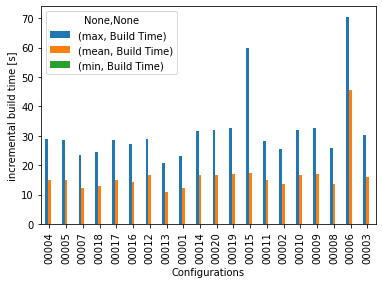

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

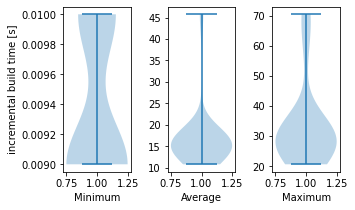

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time""
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)
df_setindex = tbl.set_index("Br2")
tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020']]

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,0.011,22.970,0.010,0.010,22.979,0.010,23.063,23.015,23.003,22.996,0.011,0.010,23.122,23.075,0.010,0.011,0.009,23.068,23.091
00002,0.011,NaN,25.467,0.009,0.010,25.565,0.010,25.462,25.479,25.598,25.549,0.010,0.010,25.603,25.608,0.010,0.010,0.010,25.622,25.648
00003,30.221,30.277,NaN,30.205,30.117,0.010,30.247,0.009,0.009,0.010,0.010,30.080,30.228,0.010,0.009,30.311,30.195,30.207,0.009,0.009
00004,0.011,0.011,28.678,NaN,0.010,28.697,0.010,28.698,28.525,28.706,28.750,0.010,0.010,28.575,28.693,0.010,0.010,0.010,28.808,28.913
00005,0.012,0.012,28.630,0.010,NaN,28.481,0.010,28.571,28.498,28.546,28.604,0.503,0.010,28.719,28.601,0.012,0.011,0.010,28.669,28.618
00006,70.223,69.921,0.010,32.619,70.411,NaN,70.080,0.139,0.010,70.033,0.009,69.984,32.544,70.082,0.010,32.667,70.059,69.917,70.500,70.173
00007,0.011,0.012,23.216,0.010,0.010,23.198,NaN,23.120,23.162,23.339,23.295,0.010,0.010,23.186,23.291,0.010,0.010,0.011,23.242,23.305
00008,25.630,25.834,0.010,25.774,25.711,0.009,25.763,NaN,0.010,0.011,0.011,25.712,25.716,0.009,0.011,25.794,25.864,25.836,0.009,0.009
00009,32.735,32.539,0.009,32.518,32.475,0.009,32.584,0.010,NaN,0.009,0.010,32.448,32.430,0.009,0.010,32.610,32.575,32.418,0.010,0.009


In [12]:
#cols = ['00001', '00002', '00003', '00004', '00005',]
#df['total'] = df[cols].gt(0).sum(axis=1)

tbl["MIN"] = tbl.idxmin(axis=1)
tbl["CB"] = tbl.min(axis=1)
tbl[["MIN", "CB"]]

,MIN,CB
Br2,,
00001,00018,0.009
00002,00004,0.009
00003,00008,0.009
00004,00005,0.010
00005,00004,0.010
00006,00011,0.009
00007,00004,0.010
00008,00006,0.009
00009,00003,0.009
